<a href="https://colab.research.google.com/github/Mani0322/Deep-learning/blob/main/cifar10_better_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar = keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=cifar.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

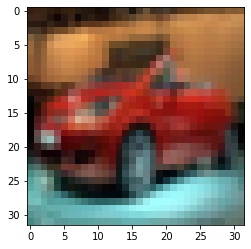

In [4]:
plt.figure()
plt.imshow(X_train[45])
plt.show()

In [5]:
X_train = X_train.reshape((50000,32,32,3))
X_test = X_test.reshape((10000,32,32,3))

In [6]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [18]:
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

In [19]:
def build_model():
  #1
  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(32,32,3)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(32,(3,3),activation="relu"))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.2))
  #2
  model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.3))
  #3
  model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.4))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(10,activation="softmax"))
  return model
  



In [20]:
model = build_model()

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)       

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
datagen.fit(X_train)

In [24]:
model.fit_generator(datagen.flow(X_train,y_train,64),epochs=50,validation_data=(X_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
782/782 [==============================] - 29s 35ms/step - loss: 1.8156 - accuracy: 0.3493 - val_loss: 1.7613 - val_accuracy: 0.4244
Epoch 2/50
782/782 [==============================] - 27s 34ms/step - loss: 1.4980 - accuracy: 0.4622 - val_loss: 1.3438 - val_accuracy: 0.5462
Epoch 3/50
782/782 [==============================] - 27s 35ms/step - loss: 1.3861 - accuracy: 0.5110 - val_loss: 1.2193 - val_accuracy: 0.5783
Epoch 4/50
782/782 [==============================] - 27s 34ms/step - loss: 1.3103 - accuracy: 0.5381 - val_loss: 1.1973 - val_accuracy: 0.5692
Epoch 5/50
782/782 [==============================] - 27s 34ms/step - loss: 1.2780 - accuracy: 0.5540 - val_loss: 1.3340 - val_accuracy: 0.5713
Epoch 6/50
782/782 [==============================] - 27s 34ms/step - loss: 1.2506 - accuracy: 0.5676 - val_loss: 1.1807 - val_accuracy: 0.6073
Epoch 7/50
782/782 [==============================] - 27s 34ms/step - loss: 1.2181 - accuracy: 0.5809 - val_loss: 1.1981 - val_accuracy:

In [25]:
test_loss,test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8992 - accuracy: 0.7293


In [40]:
new_images = X_train[:3]
prob = model.predict(new_images)
prob.round(2)

array([[0.  , 0.  , 0.02, 0.04, 0.01, 0.  , 0.93, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.68, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.1 , 0.18]],
      dtype=float32)

In [37]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]